In [117]:
from random import *
import numpy as np
import matplotlib.pyplot as plt

# def randomSolution(tspMatrix):
#    cities =list(range(len(tspMatrix))) # get a list of cities in the problem space
#    solution =[]
   
#    for i in range(len(tspMatrix)):
#         randCity = cities[randint(0,len(cities)-1)] # generate a random city from problem space
#         solution.append(randCity) # append it to the solutions list
#         cities.remove(randCity) # remove the appended city so it is not used on next iteration
#    return solution
def randomSolution(tspMatrix):
    cities = list(range(len(tspMatrix)))  # Get a list of cities in the problem space
    solution = []
    
    for i in range(len(tspMatrix)):
        randCity = cities[randint(0, len(cities)-1)]  # Generate a random city from the problem space
        solution.append(randCity)  # Append it to the solutions list
        cities.remove(randCity)  # Remove the appended city so it is not used on the next iteration
    
    return solution

In [118]:
# def routeLength(tspMatrix, solution):
#     routeLength =0
#     for i in range(len(solution)):
#         routeLength += tspMatrix[solution[i-1]][solution[i]] # i-1 ensures that the sales man returns to the starting city/node
#     return routeLength
def routeLength(tspMatrix, solution):
    routeLength = 0
    for i in range(len(solution)):
        routeLength += tspMatrix[solution[i]][solution[(i + 1) % len(solution)]]
    return routeLength

In [119]:
#define getNeighbours function
def getNeighbours(solution):
    #create a list of all the neighbours
    neighbours = []
    for i in range(len(solution)):          # this loop navigates to  all cities in the solution
        for j in range(i+1, len(solution)):
            #create a copy of the solution
            neighbour = solution.copy()
            #swapping solutions
            neighbour[i] = solution[j]
            #for a perfect swap make the jth position of the neighbour equal to solution of ith element
            neighbour[j] = solution[i]
            #append the neighbour  to the neighbours list
            neighbours.append(neighbour)
            #return the list of all the neighbours
    return neighbours

In [120]:
def getBestNeighbour(tspMatrix, neighbours):
    #get zeroth neigbour as the baseline
    bestRouteLength = routeLength(tspMatrix, neighbours[0])
    bestNeighbour = neighbours[0]
    for neighbour in neighbours:
        currentRouteLength = routeLength(tspMatrix, neighbour)
        if currentRouteLength < bestRouteLength:
            bestRouteLength = currentRouteLength
            bestNeighbour = neighbour
    return bestNeighbour, bestRouteLength

In [121]:

# def hillClimbing(tspMatrix):
#     #generates current solution's random cities
#     currentSolution = randomSolution(tspMatrix)
#     print(currentSolution)
#     #create the route length of the random cities
#     currentRouteLength = routeLength(tspMatrix,currentSolution)
#     print(currentRouteLength)
#     #get neighbours of the current solution
#     neighbours = getNeighbours(currentSolution)
#     print(neighbours)
    
#     bestNeighbour, getBestNeighbourRouteLength = getBestNeighbour(tspMatrix, neighbours)
#     #find the neighbout with the best route length
#     while getBestNeighbourRouteLength < currentRouteLength:
#         currentSolution = bestNeighbour #assign current root 
#         currentSolution = bestNeighbour
#         currentRouteLength = getBestNeighbourRouteLength
#         bestNeighbour, getBestNeighbourRouteLength = getBestNeighbour(tspMatrix, neighbours)
#     return currentSolution, currentRouteLength
# def hillClimbing(tspMatrix):
#     # Generate current solution's random cities
#     currentSolution = randomSolution(tspMatrix)
#     print(currentSolution)
    
#     # Create the route length of the random cities
#     currentRouteLength = routeLength(tspMatrix, currentSolution)
#     print(currentRouteLength)
    
#     # Get neighbors of the current solution
#     neighbors = getNeighbours(currentSolution)
#     print(neighbors)
    
#     bestNeighbor, bestNeighborRouteLength = getBestNeighbour(tspMatrix, neighbors)
    
#     # Find the neighbor with the best route length
#     while bestNeighborRouteLength < currentRouteLength:
#         currentSolution = bestNeighbor  # Assign current route
#         currentRouteLength = bestNeighborRouteLength
#         bestNeighbor, bestNeighborRouteLength = getBestNeighbour(tspMatrix, neighbors)
    
#     return currentSolution, currentRouteLength
def hillClimbing(tspMatrix):
    currentSolution = randomSolution(tspMatrix)
    currentRouteLength = routeLength(tspMatrix, currentSolution)
    
    # Store the best solution found so far
    bestSolution = currentSolution
    bestRouteLength = currentRouteLength
    
    neighbours = getNeighbours(currentSolution)
    bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tspMatrix, neighbours)
    
    while bestNeighbourRouteLength < currentRouteLength:
        currentSolution = bestNeighbour
        currentRouteLength = bestNeighbourRouteLength
        
        # Update the best solution if a better solution is found
        if bestNeighbourRouteLength < bestRouteLength:
            bestSolution = bestNeighbour
            bestRouteLength = bestNeighbourRouteLength
        
        neighbours = getNeighbours(currentSolution)
        bestNeighbour, bestNeighbourRouteLength = getBestNeighbour(tspMatrix, neighbours)
    
    return bestSolution, bestRouteLength


Outcome of Iteration 1:
Route Length: 79
Route: [35, 22, 2, 34, 13, 44, 46, 16, 8, 20, 7, 38, 15, 40, 11, 37, 33, 28, 32, 9, 5, 1, 30, 25, 24, 14, 12, 43, 26, 0, 29, 4, 41, 42, 49, 36, 45, 31, 47, 18, 3, 21, 39, 27, 23, 19, 17, 48, 10, 6]

Outcome of Iteration 2:
Route Length: 89
Route: [33, 37, 8, 23, 43, 5, 1, 46, 18, 6, 49, 25, 21, 48, 34, 3, 45, 44, 42, 31, 38, 22, 30, 9, 2, 39, 28, 4, 36, 16, 13, 17, 27, 32, 40, 14, 20, 7, 35, 10, 19, 24, 15, 47, 41, 29, 11, 26, 0, 12]

Outcome of Iteration 3:
Route Length: 97
Route: [42, 20, 19, 29, 31, 16, 26, 38, 15, 47, 7, 3, 45, 22, 37, 39, 27, 44, 18, 46, 1, 34, 28, 0, 6, 10, 2, 9, 30, 24, 25, 5, 23, 8, 12, 13, 35, 33, 43, 4, 17, 11, 40, 36, 49, 21, 48, 14, 32, 41]

Outcome of Iteration 4:
Route Length: 93
Route: [3, 46, 5, 25, 21, 39, 0, 6, 49, 48, 43, 33, 10, 27, 32, 9, 30, 8, 23, 12, 19, 29, 16, 31, 45, 36, 47, 17, 13, 34, 15, 37, 41, 2, 22, 35, 40, 24, 14, 20, 38, 26, 11, 28, 4, 44, 18, 42, 1, 7]

Outcome of Iteration 5:
Route Length: 9

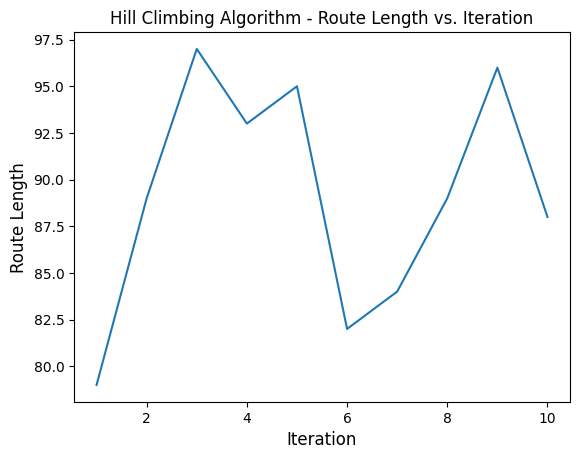

In [122]:
#represent the problem space in an array
def main():
    # # Initialize a list to store the outcomes
    # outcomes = []

    # # Open distance matrix
    # with open("TSP_Matrix.txt", "r") as f:
    #     contents = f.read()

    # # Clean the data
    # contents = contents.strip()
    # strings = contents.replace(",", " ").split()
    # numbers = list(map(int, strings))  # string to a list of integers
    # tspMatrix = np.array(numbers)

    # # Reshape the matrix into 2D
    # rows = int(np.sqrt(tspMatrix.size))
    # tspMatrix = tspMatrix.reshape((rows, -1))

    # # Run hill climbing algorithm 10 times
    # for i in range(10):
    #     result = hillClimbing(tspMatrix)
    #     outcomes.append(result)
    #     print(f"\nOutcome of Iteration {i + 1}:")
    #     print(result)

    # # Convert outcomes to a NumPy array
    # outcomes = np.array([x[0] for x in outcomes]), np.array([x[1] for x in outcomes])


    # # Visualize results
    # plt.plot(outcomes[0], outcomes[1])
    # plt.xlabel("Iteration", fontsize=12)
    # plt.ylabel("Outcome", fontsize=12)
    # plt.title("Hill Climbing Algorithm")
    # plt.xlim(10, len(outcomes[0]))  # Set x-axis limits from 10 to maximum iteration count
    # plt.show()
    # Initialize a list to store the route lengths
    route_lengths = []

    # Open distance matrix
    with open("TSP_Matrix.txt", "r") as f:
        contents = f.read()

    # Clean the data
    contents = contents.strip()
    strings = contents.replace(",", " ").split()
    numbers = list(map(int, strings))  # string to a list of integers
    tspMatrix = np.array(numbers)

    # Reshape the matrix into 2D
    rows = int(np.sqrt(tspMatrix.size))
    tspMatrix = tspMatrix.reshape((rows, -1))

    # Initialize a list to store the outcomes
    outcomes = []

    # Run hill climbing algorithm 10 times
    for i in range(10):
        result = hillClimbing(tspMatrix)
        route_lengths.append(result[1])  # Append the route length to the list
        outcomes.append(result)
        print(f"\nOutcome of Iteration {i + 1}:")
        print(f"Route Length: {result[1]}")
        print(f"Route: {result[0]}")

    # Convert outcomes to a NumPy array
    # outcomes = np.array(outcomes)
    outcomes = np.array([x[0] for x in outcomes]), np.array([x[1] for x in outcomes])

    # Visualize results
    plt.plot(range(1, 11), route_lengths)
    plt.xlabel("Iteration", fontsize=12)
    plt.ylabel("Route Length", fontsize=12)
    plt.title("Hill Climbing Algorithm - Route Length vs. Iteration")
    plt.show()


if __name__ == "__main__":
    main()


In [123]:
def routeLength(tspMatrix, solution):
    x = [35, 22, 2, 34, 13, 44, 46, 16, 8, 20, 7, 38, 15, 40, 11, 37, 33, 28, 32, 9, 5, 1, 30, 25, 24, 14, 12, 43, 26, 0, 29, 4, 41, 42, 49, 36, 45, 31, 47, 18, 3, 21, 39, 27, 23, 19, 17, 48, 10, 6]
    print(len(x))
    routeLength = 0
    for i in range(len(solution)):
        routeLength += tspMatrix[solution[i]][solution[(i + 1) % len(solution)]]
    return routeLength


50
